# Import necessary libraries

In [6]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds
import pathlib
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight

# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

# Load data and preprocess it

## Upload the data to drive:
Download the dataset from Brigthspace, and upload it to the content folder in Google Colab.


###Option 1: To avoid having to upload the dataset every time, you can upload the dataset to your google drive, and then connect this virtual machine to your drive, and make a copy of your data

In [84]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Replace the path /content/drive/MyDrive/Work/2025-CS3002/BrainTumorDataset.zip with your actual path where you copied the dataset in your drive.

In [66]:
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [7]:
data_dir = pathlib.Path("/content/BrainTumorDataset")
print("Dataset directory:", data_dir)


Dataset directory: /content/BrainTumorDataset


###Option 2: Upload the zip archive in the Files section of your virtual machine, under /content/

###After the data is loaded, let's start processing it.

In [8]:
# After you have copied the data locally, point the dataset_url to the local path
dataset_url = '/content/BrainTumorDataset (2).zip'

In [88]:

data_dir = pathlib.Path("/content/BrainTumorDataset")
print("Using dataset directory:", data_dir)


Using dataset directory: /content/BrainTumorDataset


In [9]:
!ls /content


'BrainTumorDataset (2).zip'   sample_data


In [10]:
!unzip "/content/BrainTumorDataset (2).zip" -d "/content/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/BrainTumorDataset/BrainTumorDataset/Training/notumor/Tr-no_1448.jpg  
  inflating: /content/BrainTumorDataset/BrainTumorDataset/Training/notumor/Tr-no_1449.jpg  
  inflating: /content/BrainTumorDataset/BrainTumorDataset/Training/notumor/Tr-no_1450.jpg  
  inflating: /content/BrainTumorDataset/BrainTumorDataset/Training/notumor/Tr-no_1451.jpg  
  inflating: /content/BrainTumorDataset/BrainTumorDataset/Training/notumor/Tr-no_1452.jpg  
  inflating: /content/BrainTumorDataset/BrainTumorDataset/Training/notumor/Tr-no_1453.jpg  
  inflating: /content/BrainTumorDataset/BrainTumorDataset/Training/notumor/Tr-no_1454.jpg  
  inflating: /content/BrainTumorDataset/BrainTumorDataset/Training/notumor/Tr-no_1455.jpg  
  inflating: /content/BrainTumorDataset/BrainTumorDataset/Training/notumor/Tr-no_1456.jpg  
  inflating: /content/BrainTumorDataset/BrainTumorDataset/Training/notumor/Tr-no_1457.jpg  
  inflating: /content/BrainTu

In [11]:
!ls /content/BrainTumorDataset


BrainTumorDataset  __MACOSX


In [12]:
!ls -R /content/BrainTumorDataset


/content/BrainTumorDataset:
BrainTumorDataset  __MACOSX

/content/BrainTumorDataset/BrainTumorDataset:
Testing  Training  Validation

/content/BrainTumorDataset/BrainTumorDataset/Testing:
glioma	notumor  pituitary

/content/BrainTumorDataset/BrainTumorDataset/Testing/glioma:
Te-gl_0010.jpg	Te-gl_0085.jpg	Te-gl_0160.jpg	Te-gl_0235.jpg
Te-gl_0011.jpg	Te-gl_0086.jpg	Te-gl_0161.jpg	Te-gl_0236.jpg
Te-gl_0012.jpg	Te-gl_0087.jpg	Te-gl_0162.jpg	Te-gl_0237.jpg
Te-gl_0013.jpg	Te-gl_0088.jpg	Te-gl_0163.jpg	Te-gl_0238.jpg
Te-gl_0014.jpg	Te-gl_0089.jpg	Te-gl_0164.jpg	Te-gl_0239.jpg
Te-gl_0015.jpg	Te-gl_0090.jpg	Te-gl_0165.jpg	Te-gl_0240.jpg
Te-gl_0016.jpg	Te-gl_0091.jpg	Te-gl_0166.jpg	Te-gl_0241.jpg
Te-gl_0017.jpg	Te-gl_0092.jpg	Te-gl_0167.jpg	Te-gl_0242.jpg
Te-gl_0018.jpg	Te-gl_0093.jpg	Te-gl_0168.jpg	Te-gl_0243.jpg
Te-gl_0019.jpg	Te-gl_0094.jpg	Te-gl_0169.jpg	Te-gl_0244.jpg
Te-gl_0020.jpg	Te-gl_0095.jpg	Te-gl_0170.jpg	Te-gl_0245.jpg
Te-gl_0021.jpg	Te-gl_0096.jpg	Te-gl_0171.jpg	Te-gl_0246.jpg
Te-g

In [13]:
import pathlib

train_dir = pathlib.Path("/content/BrainTumorDataset/BrainTumorDataset/Training")
val_dir   = pathlib.Path("/content/BrainTumorDataset/BrainTumorDataset/Validation")
test_dir  = pathlib.Path("/content/BrainTumorDataset/BrainTumorDataset/Testing")

print(train_dir.exists(), val_dir.exists(), test_dir.exists())




True True True


In [93]:
print(train_dir.exists(), val_dir.exists(), test_dir.exists())


False False False


In [14]:
!ls /content/BrainTumorDataset/*/



/content/BrainTumorDataset/BrainTumorDataset/:
Testing  Training  Validation

/content/BrainTumorDataset/__MACOSX/:
BrainTumorDataset


In [15]:
!ls /content/BrainTumorDataset/BrainTumorDataset




Testing  Training  Validation


In [16]:
# Count the number of images in a specific directory
glioma_train = len(list(train_dir.glob('glioma/*')))
notumor_train = len(list(train_dir.glob('notumor/*')))
pituitary_train = len(list(train_dir.glob('pituitary/*')))

glioma_test = len(list(test_dir.glob('glioma/*')))
notumor_test = len(list(test_dir.glob('notumor/*')))
pituitary_test = len(list(test_dir.glob('pituitary/*')))

print("Training set:")
print("Glioma:", glioma_train)
print("No Tumor:", notumor_train)
print("Pituitary:", pituitary_train)

print("\nTesting set:")
print("Glioma:", glioma_test)
print("No Tumor:", notumor_test)
print("Pituitary:", pituitary_test)

Training set:
Glioma: 501
No Tumor: 1551
Pituitary: 501

Testing set:
Glioma: 300
No Tumor: 301
Pituitary: 300


In [17]:
# BEGIN YOUR CODE HERE

# Brain tumour dataset is split into train, validation and test folders. Inside those folders you will
# find additional folders: glioma, pituitary, notumor. You can explore the folders using
# 'Files' tab from the right hand side.
# Tip: use the len() function

# 1a. How many images do we have in training for positive glaucoma? How many for negative glaucoma?


# 1b. How about in the testing set?


# 1c. How about in the validation set?


# Q. Is the dataset balanced or not?

# END YOUR CODE HERE


glioma_train = len(list(train_dir.glob('glioma/*')))
notumor_train = len(list(train_dir.glob('notumor/*')))
pituitary_train = len(list(train_dir.glob('pituitary/*')))

print("Training set:")
print("Glioma:", glioma_train)
print("No Tumor:", notumor_train)
print("Pituitary:", pituitary_train)

# Counting images in Validation set
glioma_val = len(list(val_dir.glob('glioma/*')))
notumor_val = len(list(val_dir.glob('notumor/*')))
pituitary_val = len(list(val_dir.glob('pituitary/*')))

print("\nValidation set:")
print("Glioma:", glioma_val)
print("No Tumor:", notumor_val)
print("Pituitary:", pituitary_val)

# Counting images in Testing set
glioma_test = len(list(test_dir.glob('glioma/*')))
notumor_test = len(list(test_dir.glob('notumor/*')))
pituitary_test = len(list(test_dir.glob('pituitary/*')))

print("\nTesting set:")
print("Glioma:", glioma_test)
print("No Tumor:", notumor_test)
print("Pituitary:", pituitary_test)




print("\nANSWER:")
print(f"1a) Training set - Glioma: {glioma_train}, No Tumor: {notumor_train}")
print(f"1b) Testing set - Glioma: {glioma_test}, No Tumor: {notumor_test}")
print(f"1c) Validation set - Glioma: {glioma_val}, No Tumor: {notumor_val}")

print("\nIs the dataset balanced?")
if (notumor_train > glioma_train and notumor_train > pituitary_train):
    print("No, the dataset is imbalanced. The No Tumor class has a much higher number of images \nthan the Glioma and Pituitary classes.")
else:
    print("Yes, the dataset is balanced.")

Training set:
Glioma: 501
No Tumor: 1551
Pituitary: 501

Validation set:
Glioma: 150
No Tumor: 150
Pituitary: 150

Testing set:
Glioma: 300
No Tumor: 301
Pituitary: 300

ANSWER:
1a) Training set - Glioma: 501, No Tumor: 1551
1b) Testing set - Glioma: 300, No Tumor: 301
1c) Validation set - Glioma: 150, No Tumor: 150

Is the dataset balanced?
No, the dataset is imbalanced. The No Tumor class has a much higher number of images 
than the Glioma and Pituitary classes.


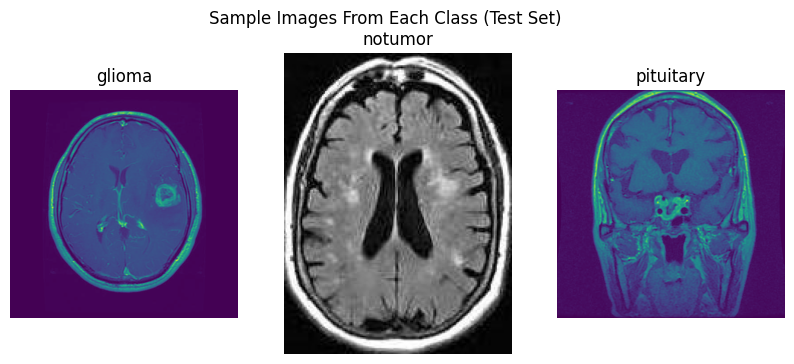

In [126]:
# Create a list of file paths for glaucoma images
#positive_images = list(data_dir.glob('Training/glioma/*'))
# Open and display the first glaucoma image in the list
#PIL.Image.open(str(positive_images[0]))

import matplotlib.pyplot as plt

# Display one sample image per class from the test dataset

plt.figure(figsize=(10, 4))

class_folders = ["glioma", "notumor", "pituitary"]

for i, cls in enumerate(class_folders):
    image_path = list(test_dir.glob(f"{cls}/*"))[0]  # first image in class
    img = PIL.Image.open(str(image_path))

    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.suptitle("Sample Images From Each Class (Test Set)")
plt.show()

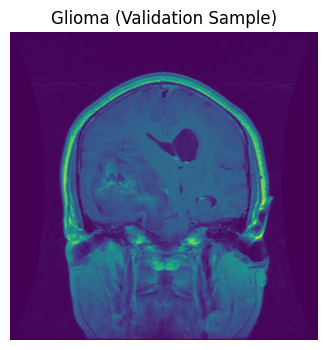

In [ ]:
# BEGIN YOUR CODE HERE

# 2. Display a glioma image from the validation dataset
# Create a list of file paths for glioma images


# Open and display the first glioma image in the list



# END YOUR CODE HERE

glioma_val_path = list(val_dir.glob('glioma/*'))[0]  # first glioma image
glioma_image = PIL.Image.open(str(glioma_val_path))

plt.figure(figsize=(4, 4))
plt.imshow(glioma_image)
plt.title("Glioma (Validation Sample)")
plt.axis("off")
plt.show()

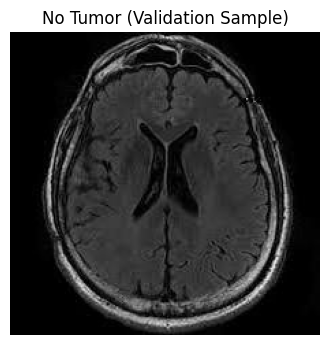

In [ ]:
# BEGIN YOUR CODE HERE

# 2. Display a normal image from the validation dataset

# Create a list of file paths for the no tumour images


# Open and display the first  image in the list


# END YOUR CODE HERE

notumor_val_path = list(val_dir.glob('notumor/*'))[0]  # first no tumor image
notumor_image = PIL.Image.open(str(notumor_val_path))

plt.figure(figsize=(4, 4))
plt.imshow(notumor_image)
plt.title("No Tumor (Validation Sample)")
plt.axis("off")
plt.show()

# Define a deep learning model that will learn the differences between glioma, pituitary and normal brain images


In [18]:
# Define batch size and image dimensions for training

# BEGIN YOUR CODE HERE
# The batch size is the number of samples processed before the model is updated.
# Choose an appropriate batch size.

batch_size = 32


# What is the resolution of the images?
# Specify the size to resize images to after they are read from disk.
# Since the pipeline processes batches of images that must all have the same size, this must be provided.

img_height = 150
img_width  = 150


# END YOUR CODE HERE

In [20]:
#combining the folder paths
train_data_dir  = os.path.join(data_dir,'Training')
valid_data_dir = os.path.join(data_dir,'Validation')
test_data_dir = os.path.join(data_dir,'Testing')

In [21]:
# Create a TensorFlow image dataset from a directory
# BEGIN YOUR CODE HERE
# Use the function tf.keras.utils.image_dataset_from_directory to load
# the training dataset: https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
# 1. First argument is your training directory folder (train_data_dir),
# 2. Do NOT use validation_split since we only want a training set,
# 3. You can set a seed such that when you repeat experiments you get similar results, e.g. seed=123,
# 4. For image size, use the img_height and img_width variables you defined previously,
# 5. For batch size, use the batch_size variable you defined earlier in the code.
# tf.keras.utils.image_dataset_from_directory(
#     directory,
#     seed=123,
#     image_size=(height, width),
#     batch_size=-1,
#     shuffle=False
# )
# Example:



# END YOUR CODE HERE

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=123,  # for reproducibility
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes:", class_names)

Found 2550 files belonging to 3 classes.
Classes: ['glioma', 'notumor', 'pituitary']


In [113]:
# Create a layer to normalise pixel values to the [0, 1] range.
# By default, when you load an image, each pixel value will have a value between 0-255
# but, in neural networks, we need as input normalised values in [0,1] interval.
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [114]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image), first_image[0][0])

0.0 1.0 tf.Tensor([0.00775512 0.00775512 0.00775512], shape=(3,), dtype=float32)


In [115]:
# BEGIN YOUR CODE HERE
# Define the number of classes in the classification problem
# How many classes do we have in this dataset?
num_classes = 3


# END YOUR CODE HERE

In [122]:
# BEGIN YOUR CODE HERE
# Define a tensorflow model using the tf.keras.Sequential class: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# The last layer should be a Dense layer with the number of output neurons num_classes
# Use as a starting point the tf.keras.Sequential model defined for the MNIST problem.
# See Lab-DeepLearning-ImageClassification.
# For the first Conv2D layer, you are not required to specify the input shape. If that
# parameter is not given, tensorflow library will infer the size of the input when
# you fit the model, so it will depend on the size of the dataset.
# Important: change the output of the last Dense layer to match the number of classes for this problem.
# If you don't use any of the Dropout layers what accuracy do you get?
# What accuracy do you get with the Dropout layers?

model = tf.keras.Sequential([
    # Normalise pixel values from [0, 255] → [0, 1]
    normalization_layer,

    # pooling to reduce image size
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    # Flatten to go from feature maps to feature vector
    tf.keras.layers.Flatten(),

    # Fully connected layer
    tf.keras.layers.Dense(128, activation='relu'),

    # Dropout to reduce overfitting
    tf.keras.layers.Dropout(0.5),

    # Output layer: logits for 3 classes (glioma, notumor, pituitary)
    tf.keras.layers.Dense(num_classes)
])





# END YOUR CODE HERE

#The model is compiled with the Adam optimizer and categorical cross entropy loss for multi-class classification
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']) # Monitor accuracy and F1 score during training



In [117]:
# Extract training labels
y_train = np.concatenate([y for x, y in train_ds], axis=0)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# TIP: Search how you can use the class weights during training to improve your results

Class Weights: {0: np.float64(1.7), 1: np.float64(0.5483870967741935), 2: np.float64(1.7)}


In [118]:
#Loading validation dataset

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 450 files belonging to 3 classes.


In [119]:
#Loading Test dataset

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 900 files belonging to 3 classes.


In [ ]:
# BEGIN YOUR CODE HERE
# Train the model on the provided dataset for a specified number of epochs
# Modify the network architecture such that you maximise the accuracy.
# Tip: aim to get an accuracy of at least 70% on the training set.
# For this, you can use the function fit, as in model.fit(...)
# The first argument is the train_ds variable defined above.
# This variable contains both the x (data - glaucoma and normal images) and y
# (labels - glaucoma vs normal).
# Start training using 5 epochs. What is the accuracy you get?
# How about if you increase the number of epochs?
# Use as validation_data the val_ds variable you defined previously


# Number of epochs
epochs = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Print
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Accuracy after {epochs} epochs: {final_train_acc:.4f}")
print(f"Final Validation Accuracy after {epochs} epochs: {final_val_acc:.4f}")




# END YOUR CODE HERE

Epoch 1/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - accuracy: 0.7552 - loss: 0.5398 - val_accuracy: 0.7089 - val_loss: 0.7716
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9462 - loss: 0.1801 - val_accuracy: 0.8356 - val_loss: 0.4371
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9768 - loss: 0.0771 - val_accuracy: 0.8844 - val_loss: 0.3114
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9825 - loss: 0.0674 - val_accuracy: 0.8111 - val_loss: 0.5380
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9831 - loss: 0.0560 - val_accuracy: 0.8667 - val_loss: 0.3860
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9911 - loss: 0.0321 - val_accuracy: 0.8622 - val_loss: 0.3791
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9952 - loss: 0.0116 - val_accuracy: 0.6889 - val_loss: 1.4547
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9909 - loss: 0.0368 - val_accuracy: 0.8422 

In [ ]:
from scipy.ndimage import gaussian_filter1d  # for smoothing

# function to plot loss/accuracy with trend lines
def plot_loss_accuracy(history, smooth_sigma=2):
    # Extract loss and accuracy values
    loss_values = history.history['loss']
    acc_values = history.history['accuracy']

    # Validation (if available)
    val_loss = history.history.get('val_loss')
    val_acc = history.history.get('val_accuracy')

    epochs = np.arange(1, len(loss_values) + 1)

    # --- Plot Training & Validation Loss ---
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, marker='o', linestyle='-', color='b', alpha=0.5, label='Training Loss')
    plt.plot(epochs, gaussian_filter1d(loss_values, sigma=smooth_sigma), color='b', linewidth=2, label='Trend (Train)')

    if val_loss is not None:
        plt.plot(epochs, val_loss, marker='x', linestyle='--', color='r', alpha=0.5, label='Validation Loss')
        plt.plot(epochs, gaussian_filter1d(val_loss, sigma=smooth_sigma), color='r', linewidth=2, label='Trend (Val)')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.grid(True)
    plt.legend()

    # --- Plot Training & Validation Accuracy ---
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc_values, marker='o', linestyle='-', color='g', alpha=0.5, label='Training Accuracy')
    plt.plot(epochs, gaussian_filter1d(acc_values, sigma=smooth_sigma), color='g', linewidth=2, label='Trend (Train)')

    if val_acc is not None:
        plt.plot(epochs, val_acc, marker='x', linestyle='--', color='orange', alpha=0.5, label='Validation Accuracy')
        plt.plot(epochs, gaussian_filter1d(val_acc, sigma=smooth_sigma), color='orange', linewidth=2, label='Trend (Val)')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [127]:
plot_loss_accuracy(history)

NameError: name 'plot_loss_accuracy' is not defined

In [128]:
# Let's load the testing dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,  # correct variable name + correct path
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)


Found 900 files belonging to 3 classes.


Test Loss: 0.4742
Test Accuracy: 0.8922
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


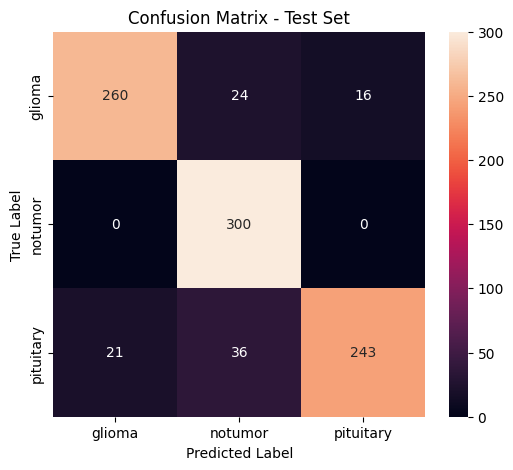


Classification Report:
              precision    recall  f1-score   support

      glioma       0.93      0.87      0.90       300
     notumor       0.83      1.00      0.91       300
   pituitary       0.94      0.81      0.87       300

    accuracy                           0.89       900
   macro avg       0.90      0.89      0.89       900
weighted avg       0.90      0.89      0.89       900



In [ ]:
# BEGIN YOUR CODE HERE
# What is the loss and accuracy on the Testing dataset?
# Compute and plot the confusion matrix on the test dataset
# Tip: instead of (x_test, y_test) we used in the lab last week, you can use
# directly test_ds which contains both data and labels
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
# When you print the output of the evaluate function is run, it will return both
# the loss and accuracy, maybe in a  format like [loss_value, accuracy_value]
# print("Model accuracy on the test set is:", model.evaluate(test_ds))
# Display the confusion matrix, precision, recall and f1-score

# 1. Evaluate loss and accuracy on the test dataset
test_loss, test_acc = model.evaluate(test_ds, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# 2. Get true labels and predictions
# Collect all true labels from the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)


y_logits = model.predict(test_ds)
y_pred = np.argmax(y_logits, axis=1)

# 3 confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set")
plt.show()

# 4 precision, recall and F1-score
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))




# END YOUR CODE HERE

In [ ]:
# Try to improve the model such that it performs well on both training and testing datasets.